In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [11]:
data = yf.download(tickers='^NDX', start = '2024-01-01',end = '2025-06-02')

[*********************100%***********************]  1 of 1 completed


In [12]:
data.columns

MultiIndex([( 'Close', '^NDX'),
            (  'High', '^NDX'),
            (   'Low', '^NDX'),
            (  'Open', '^NDX'),
            ('Volume', '^NDX')],
           names=['Price', 'Ticker'])

In [13]:
data.columns = [f"{col[0]}" for col in data.columns]

In [14]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [15]:
data.shape

(354, 5)

In [16]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

In [17]:
indicator_cols = ['RSI', 'EMAF', 'EMAM', 'EMAS']


In [18]:
data

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS
Date,,,,,,,,,
2024-01-02,16543.939453,16686.599609,16453.150391,16667.300781,5791170000,NaN,NaN,NaN,NaN
2024-01-03,16368.490234,16471.080078,16352.139648,16413.259766,5449950000,0.000000,NaN,NaN,NaN
2024-01-04,16282.009766,16419.439453,16276.429688,16290.780273,5289220000,0.000000,NaN,NaN,NaN
2024-01-05,16305.980469,16415.390625,16249.190430,16281.740234,5232820000,0.931878,NaN,NaN,NaN
2024-01-08,16649.869141,16655.230469,16349.389648,16354.219727,6337770000,13.296017,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20171.046040,20127.699476
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20195.678599,20144.749685
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20217.906150,20160.291675


In [19]:
data[indicator_cols] = data[indicator_cols].fillna(method='bfill')

C:\Users\PC\AppData\Local\Temp\ipykernel_16572\3339117665.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[indicator_cols] = data[indicator_cols].fillna(method='bfill')


In [20]:
data

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS
Date,,,,,,,,,
2024-01-02,16543.939453,16686.599609,16453.150391,16667.300781,5791170000,0.000000,16969.200586,17758.888750,18317.691432
2024-01-03,16368.490234,16471.080078,16352.139648,16413.259766,5449950000,0.000000,16969.200586,17758.888750,18317.691432
2024-01-04,16282.009766,16419.439453,16276.429688,16290.780273,5289220000,0.000000,16969.200586,17758.888750,18317.691432
2024-01-05,16305.980469,16415.390625,16249.190430,16281.740234,5232820000,0.931878,16969.200586,17758.888750,18317.691432
2024-01-08,16649.869141,16655.230469,16349.389648,16354.219727,6337770000,13.296017,16969.200586,17758.888750,18317.691432
...,...,...,...,...,...,...,...,...,...
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20171.046040,20127.699476
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20195.678599,20144.749685
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20217.906150,20160.291675


In [21]:
# Copy the 'Close' column and add it as a new column 'Adj Close'
data['Adj Close'] = data[('Close')]


In [36]:
data.head()

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close
Date,,,,,,,,,,
2024-09-30,20060.689453,20072.429688,19852.849609,19959.259766,5846150000,0.000000,20142.361035,21028.616406,20494.101862,20060.689453
2024-10-01,19773.300781,20056.199219,19622.289062,20046.060547,5879980000,0.000000,20142.361035,21028.616406,20494.101862,19773.300781
2024-10-02,19802.589844,19876.699219,19630.910156,19725.949219,5489040000,0.674845,20142.361035,21028.616406,20494.101862,19802.589844
2024-10-03,19793.339844,19902.699219,19688.220703,19712.330078,5208990000,0.673314,20142.361035,21028.616406,20494.101862,19793.339844
2024-10-04,20035.019531,20045.689453,19829.490234,20025.160156,5136070000,6.578794,20142.361035,21028.616406,20494.101862,20035.019531


In [22]:
data.shape

(354, 10)

In [23]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
       'Adj Close'],
      dtype='object')

In [24]:
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16572\1580431170.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [25]:
data

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
2024-01-02,16543.939453,16686.599609,16453.150391,16667.300781,5791170000,0.000000,16969.200586,17758.888750,18317.691432,16543.939453,-44.769531,0,16368.490234
2024-01-03,16368.490234,16471.080078,16352.139648,16413.259766,5449950000,0.000000,16969.200586,17758.888750,18317.691432,16368.490234,-8.770508,0,16282.009766
2024-01-04,16282.009766,16419.439453,16276.429688,16290.780273,5289220000,0.000000,16969.200586,17758.888750,18317.691432,16282.009766,24.240234,1,16305.980469
2024-01-05,16305.980469,16415.390625,16249.190430,16281.740234,5232820000,0.931878,16969.200586,17758.888750,18317.691432,16305.980469,295.649414,1,16649.869141
2024-01-08,16649.869141,16655.230469,16349.389648,16354.219727,6337770000,13.296017,16969.200586,17758.888750,18317.691432,16649.869141,146.738281,1,16678.699219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20171.046040,20127.699476,20915.660156,213.541016,1,21414.990234
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20195.678599,20144.749685,21414.990234,-133.519531,0,21318.169922
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20217.906150,20160.291675,21318.169922,-247.589844,0,21363.949219


In [26]:
data.tail(10)

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
2025-05-16,21427.939453,21428.789062,21246.419922,21375.630859,10509820000,68.943002,20178.690319,20065.001708,20055.079946,21427.939453,308.919922,1,21447.050781
2025-05-19,21447.050781,21464.560547,21138.130859,21138.130859,13080030000,69.093266,20299.486554,20092.369016,20073.516646,21447.050781,19.738281,1,21367.369141
2025-05-20,21367.369141,21399.990234,21226.660156,21347.630859,9047100000,67.637871,20401.189657,20117.616543,20090.653765,21367.369141,-136.951172,0,21080.359375
2025-05-21,21080.359375,21482.980469,21002.099609,21217.310547,11112460000,62.573745,20465.872487,20136.680758,20103.762448,21080.359375,15.009766,1,21112.470703
2025-05-22,21112.470703,21263.179688,21046.220703,21097.460938,8289710000,62.905195,20527.453270,20156.003331,20117.122823,21112.470703,109.291016,1,20915.660156
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20171.046040,20127.699476,20915.660156,213.541016,1,21414.990234
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20195.678599,20144.749685,21414.990234,-133.519531,0,21318.169922
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20217.906150,20160.291675,21318.169922,-247.589844,0,21363.949219
2025-05-29,21363.949219,21611.539062,21260.730469,21611.539062,11016850000,63.489276,20771.830176,20240.600072,20176.234159,21363.949219,10.140625,1,21340.990234


In [27]:
data.shape

(354, 13)

In [28]:
data.dropna(inplace=True)


In [29]:
data.shape

(353, 13)

In [30]:
data.reset_index(inplace = True)

In [31]:
data.to_csv('numericdata.csv', index=False)

In [32]:
# Load sentiment data
sentiment_df = pd.read_csv("../data/cleaned_scores.csv", parse_dates=["date"])

# Rename to match data DataFrame
sentiment_df.rename(columns={'date': 'Date'}, inplace=True)

# Merge on Date 
data = pd.merge(data, sentiment_df, how='left', on='Date')

# Fill missing sentiment values (e.g., weekends/holidays)
data[['avg_sentiment', 'avg_score', 'article_count']] = data[['avg_sentiment', 'avg_score', 'article_count']].fillna(method='ffill')


C:\Users\PC\AppData\Local\Temp\ipykernel_16572\3209750003.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['avg_sentiment', 'avg_score', 'article_count']] = data[['avg_sentiment', 'avg_score', 'article_count']].fillna(method='ffill')


In [33]:
data

,Date,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose,avg_sentiment,avg_score,article_count
0,2024-01-02,16543.939453,16686.599609,16453.150391,16667.300781,5791170000,0.000000,16969.200586,17758.888750,18317.691432,16543.939453,-44.769531,0,16368.490234,NaN,NaN,NaN
1,2024-01-03,16368.490234,16471.080078,16352.139648,16413.259766,5449950000,0.000000,16969.200586,17758.888750,18317.691432,16368.490234,-8.770508,0,16282.009766,NaN,NaN,NaN
2,2024-01-04,16282.009766,16419.439453,16276.429688,16290.780273,5289220000,0.000000,16969.200586,17758.888750,18317.691432,16282.009766,24.240234,1,16305.980469,NaN,NaN,NaN
3,2024-01-05,16305.980469,16415.390625,16249.190430,16281.740234,5232820000,0.931878,16969.200586,17758.888750,18317.691432,16305.980469,295.649414,1,16649.869141,NaN,NaN,NaN
4,2024-01-08,16649.869141,16655.230469,16349.389648,16354.219727,6337770000,13.296017,16969.200586,17758.888750,18317.691432,16649.869141,146.738281,1,16678.699219,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2025-05-22,21112.470703,21263.179688,21046.220703,21097.460938,8289710000,62.905195,20527.453270,20156.003331,20117.122823,21112.470703,109.291016,1,20915.660156,0.013605,0.946303,294.0
349,2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20171.046040,20127.699476,20915.660156,213.541016,1,21414.990234,0.086207,0.951137,290.0
350,2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20195.678599,20144.749685,21414.990234,-133.519531,0,21318.169922,0.071918,0.939232,292.0
351,2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20217.906150,20160.291675,21318.169922,-247.589844,0,21363.949219,-0.017123,0.946628,292.0


In [34]:
data = data[data['Date'] > pd.to_datetime('2024-12-31')].reset_index(drop=True)

In [36]:
data.to_csv('sentimentdata.csv', index=False)

In [35]:
#TODO- 06-01 ve  05-01i kapsa garip bi şekilde fazla drop var bak
data

,Date,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose,avg_sentiment,avg_score,article_count
0,2025-01-02,20975.619141,21236.589844,20800.500000,21120.050781,8737550000,45.649480,21333.273669,20470.713628,19999.794963,20975.619141,229.371094,1,21326.160156,0.010101,0.946864,297.0
1,2025-01-03,21326.160156,21359.630859,21075.890625,21096.789062,8214050000,51.503102,21332.596192,20487.653163,20017.362714,21326.160156,8.320312,1,21559.500000,-0.010169,0.937992,295.0
2,2025-01-06,21559.500000,21703.490234,21462.519531,21551.179688,9586840000,54.948276,21354.206078,20508.877853,20037.788373,21559.500000,-446.851562,0,21173.039062,-0.006969,0.953787,287.0
3,2025-01-07,21173.039062,21621.250000,21101.089844,21619.890625,13371130000,48.821227,21336.952077,20522.029560,20052.824806,21173.039062,24.210938,1,21180.970703,0.075601,0.949138,291.0
4,2025-01-08,21180.970703,21242.609375,20992.080078,21156.759766,8851720000,48.945855,21322.096708,20535.077899,20067.767136,21180.970703,-164.708984,0,20847.580078,0.000000,0.947489,291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2025-05-22,21112.470703,21263.179688,21046.220703,21097.460938,8289710000,62.905195,20527.453270,20156.003331,20117.122823,21112.470703,109.291016,1,20915.660156,0.013605,0.946303,294.0
97,2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20171.046040,20127.699476,20915.660156,213.541016,1,21414.990234,0.086207,0.951137,290.0
98,2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20195.678599,20144.749685,21414.990234,-133.519531,0,21318.169922,0.071918,0.939232,292.0
99,2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20217.906150,20160.291675,21318.169922,-247.589844,0,21363.949219,-0.017123,0.946628,292.0


In [50]:
data.drop(['Close'], axis=1, inplace=True)

In [51]:
data.shape

(101, 16)

In [52]:
feature_columns = ['High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
                   'avg_sentiment']

backcandles = 60

In [53]:
# Build X sequences
X = []
for j in range(len(feature_columns)):
    X.append([])
    for i in range(backcandles, len(data)):
        X[j].append(data[feature_columns].iloc[i-backcandles:i, j].values)

X = np.moveaxis(X, [0], [2])  # (samples, backcandles, features)
y = data['TargetClass'].values[backcandles:]



In [54]:
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (41, 60, 9), y shape: (41,)


In [55]:
# === 2. Train test split ===

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
# Scale features: flatten 3D to 2D, scale, reshape
scaler = StandardScaler()
X_train_2d = X_train.reshape(-1, X_train.shape[2])
X_train_scaled_2d = scaler.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)

X_test_2d = X_test.reshape(-1, X_test.shape[2])
X_test_scaled_2d = scaler.transform(X_test_2d)
X_test_scaled = X_test_scaled_2d.reshape(X_test.shape)


In [57]:
# === 4. Baseline Models ===
# Flatten data for classical ML models (no sequences)
X_train_flat = X_train_scaled.reshape(X_train.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test.shape[0], -1)


In [58]:
print("\n--- Logistic Regression Baseline ---")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_flat, y_train)
y_pred_lr = lr.predict(X_test_flat)
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

print("\n--- Random Forest Baseline ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)
y_pred_rf = rf.predict(X_test_flat)
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


--- Logistic Regression Baseline ---
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.67      0.40      0.50         5

    accuracy                           0.56         9
   macro avg       0.58      0.57      0.55         9
weighted avg       0.59      0.56      0.54         9

Accuracy: 0.5556

--- Random Forest Baseline ---
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9

Accuracy: 0.6667


In [59]:
# === 5. Build LSTM Classification Model ===

inputs = Input(shape=(backcandles, len(feature_columns)))
x = LSTM(100, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x = LSTM(50)(x)
x = Dropout(0.3)(x)
x = Dense(25, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
# === 6. Train model with validation split ===
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    verbose=2)

Epoch 1/50
1/1 - 2s - 2s/step - accuracy: 0.5357 - loss: 0.6836 - val_accuracy: 0.2500 - val_loss: 0.7278
Epoch 2/50
1/1 - 0s - 70ms/step - accuracy: 0.6786 - loss: 0.6484 - val_accuracy: 0.2500 - val_loss: 0.7385
Epoch 3/50
1/1 - 0s - 67ms/step - accuracy: 0.6429 - loss: 0.6309 - val_accuracy: 0.2500 - val_loss: 0.7576
Epoch 4/50
1/1 - 0s - 67ms/step - accuracy: 0.6071 - loss: 0.6144 - val_accuracy: 0.2500 - val_loss: 0.7779
Epoch 5/50
1/1 - 0s - 65ms/step - accuracy: 0.6429 - loss: 0.6190 - val_accuracy: 0.2500 - val_loss: 0.7915
Epoch 6/50
1/1 - 0s - 66ms/step - accuracy: 0.6429 - loss: 0.5959 - val_accuracy: 0.2500 - val_loss: 0.8034
Epoch 7/50
1/1 - 0s - 68ms/step - accuracy: 0.6786 - loss: 0.5834 - val_accuracy: 0.2500 - val_loss: 0.8127
Epoch 8/50
1/1 - 0s - 69ms/step - accuracy: 0.7143 - loss: 0.5800 - val_accuracy: 0.5000 - val_loss: 0.8148
Epoch 9/50
1/1 - 0s - 68ms/step - accuracy: 0.6071 - loss: 0.5876 - val_accuracy: 0.5000 - val_loss: 0.8124
Epoch 10/50
1/1 - 0s - 66ms/st

In [61]:
from sklearn.metrics import f1_score
import numpy as np
y_pred_prob = model.predict(X_test_scaled).flatten()

thresholds = np.linspace(0, 1, 101)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold by F1 score: {best_thresh:.2f} with F1: {max(f1_scores):.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Best Threshold by F1 score: 0.18 with F1: 0.769


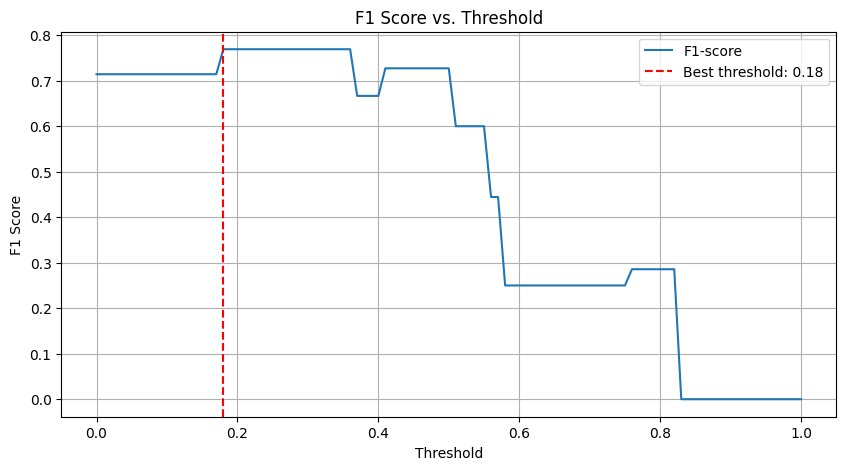

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best threshold: {best_thresh:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.grid()
plt.show()


In [63]:
# === 7. Evaluate LSTM ===
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.38).astype(int)

print("\n--- LSTM Classification Report ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.80      0.67         5

    accuracy                           0.56         9
   macro avg       0.54      0.53      0.50         9
weighted avg       0.54      0.56      0.52         9

Accuracy: 0.5556



--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.46      0.32      0.38        97
           1       0.54      0.68      0.60       113

    accuracy                           0.51       210
   macro avg       0.50      0.50      0.49       210
weighted avg       0.50      0.51      0.50       210

Accuracy: 0.5143 without sentiment

--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.54      1.00      0.70       113

    accuracy                           0.54       210
   macro avg       0.27      0.50      0.35       210
weighted avg       0.29      0.54      0.38       210

Accuracy: 0.5381 with sentiment

--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9

Accuracy: 0.6667 with dropna

--- LSTM Classification Report ---
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.67      0.50      0.57         8

    accuracy                           0.60        15
   macro avg       0.61      0.61      0.60        15
weighted avg       0.61      0.60      0.60        15

Accuracy: 0.6000 with 30 lookback

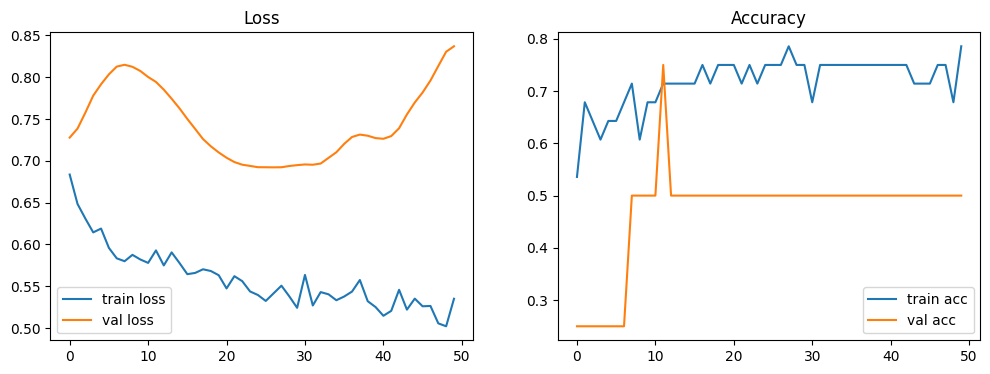

In [64]:
# === 8. Plot training history ===
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()


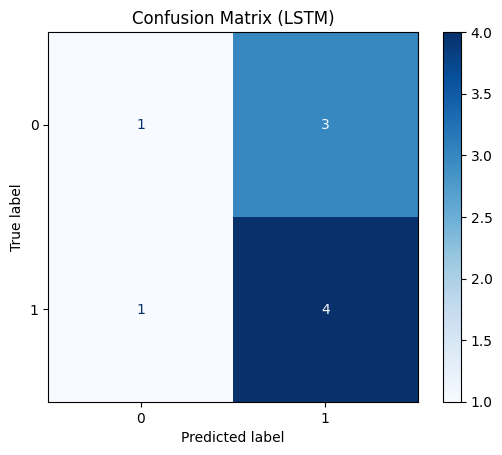

In [65]:
# === 9. Confusion matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (LSTM)")
plt.show()

Epoch 1/50
1/1 - 3s - 3s/step - accuracy: 0.4412 - loss: 0.7783 - val_accuracy: 0.7500 - val_loss: 0.6804 - learning_rate: 1.0000e-03
Epoch 2/50
1/1 - 0s - 78ms/step - accuracy: 0.5294 - loss: 0.8059 - val_accuracy: 1.0000 - val_loss: 0.6706 - learning_rate: 1.0000e-03
Epoch 3/50
1/1 - 0s - 72ms/step - accuracy: 0.7059 - loss: 0.5863 - val_accuracy: 1.0000 - val_loss: 0.6767 - learning_rate: 1.0000e-03
Epoch 4/50
1/1 - 0s - 73ms/step - accuracy: 0.6176 - loss: 0.7172 - val_accuracy: 1.0000 - val_loss: 0.6887 - learning_rate: 1.0000e-03
Epoch 5/50
1/1 - 0s - 70ms/step - accuracy: 0.6765 - loss: 0.6805 - val_accuracy: 1.0000 - val_loss: 0.6938 - learning_rate: 1.0000e-03
Epoch 6/50
1/1 - 0s - 73ms/step - accuracy: 0.7353 - loss: 0.5869 - val_accuracy: 1.0000 - val_loss: 0.7029 - learning_rate: 1.0000e-03
Epoch 7/50
1/1 - 0s - 72ms/step - accuracy: 0.7059 - loss: 0.5627 - val_accuracy: 0.7500 - val_loss: 0.7098 - learning_rate: 1.0000e-03
Epoch 8/50
1/1 - 0s - 85ms/step - accuracy: 0.7059

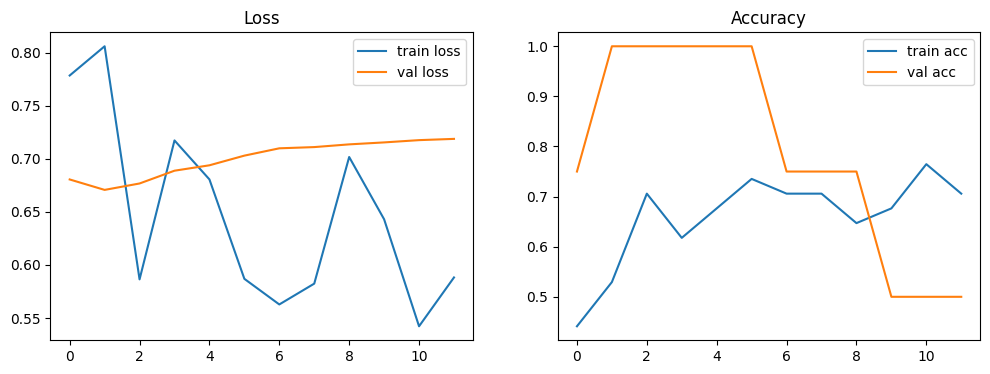

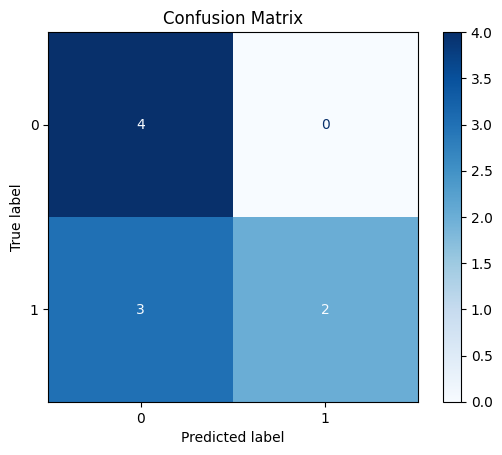

In [66]:
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# === 1. New scaling ===

scaler = RobustScaler()
X_train_2d = X_train.reshape(-1, X_train.shape[2])
X_train_scaled_2d = scaler.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)

X_test_2d = X_test.reshape(-1, X_test.shape[2])
X_test_scaled_2d = scaler.transform(X_test_2d)
X_test_scaled = X_test_scaled_2d.reshape(X_test.shape)

# === 2. SMOTE to oversample minority class in training set ===
X_train_flat = X_train_scaled.reshape(X_train.shape[0], -1)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_flat, y_train)

# Reshape back for LSTM input
X_train_resampled = X_train_resampled.reshape(-1, backcandles, len(feature_columns))

# === 3. LSTM with improvements ===

inputs = Input(shape=(backcandles, len(feature_columns)))
x = Bidirectional(LSTM(100, return_sequences=True))(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(50))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# === 4. Callbacks ===

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# === 5. Train ===

history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    shuffle=True,
    verbose=2)

# === 6. Evaluate ===

y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


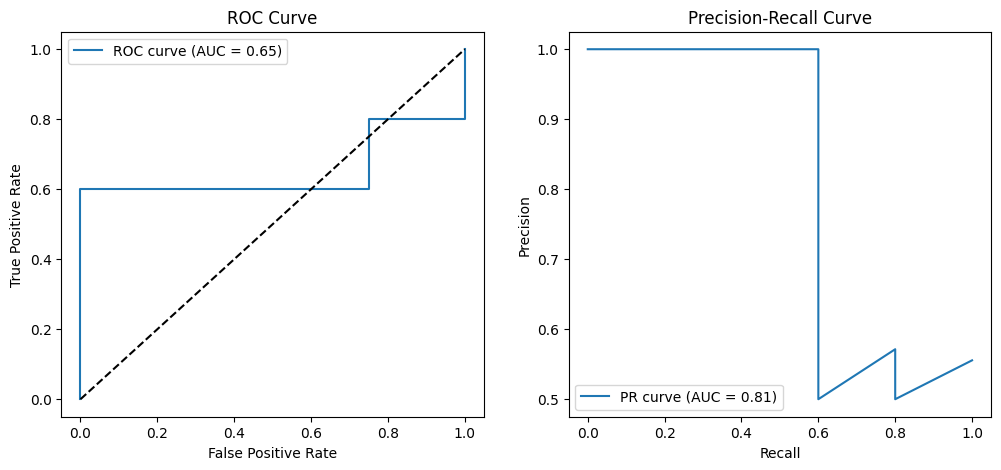

In [67]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()


In [68]:
import numpy as np

threshold = 0.5
y_pred_label = (y_pred_prob >= threshold).astype(int)

misclassified_idx = np.where(y_pred_label != y_test.flatten())[0]
print(f"Total misclassified samples: {len(misclassified_idx)}")

print("\nExamples of misclassified samples:")
for idx in misclassified_idx[:5]:
    print(f"Index: {idx}, True Label: {y_test[idx]}, Predicted Prob: {y_pred_prob[idx]:.3f}")
    # Optionally print feature info:
    # print(data.iloc[idx + backcandles][feature_columns])


Total misclassified samples: 3

Examples of misclassified samples:
Index: 2, True Label: 1, Predicted Prob: 0.454
Index: 4, True Label: 1, Predicted Prob: 0.460
Index: 5, True Label: 1, Predicted Prob: 0.496


In [69]:
from sklearn.metrics import f1_score

thresholds = np.linspace(0, 1, 101)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold by F1 score: {best_thresh:.2f} with F1: {max(f1_scores):.3f}")


Best Threshold by F1 score: 0.49 with F1: 0.750


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6032 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.7452
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6048 - loss: 0.7107 - val_accuracy: 0.5000 - val_loss: 0.7455
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7651 - loss: 0.5329 - val_accuracy: 0.5000 - val_loss: 0.7462
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5587 - loss: 0.6428 - val_accuracy: 0.5000 - val_loss: 0.7468
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7683 - loss: 0.5450 - val_accuracy: 0.5000 - val_loss: 0.7472
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5587 - loss: 0.7193 - val_accuracy: 0.5000 - val_loss: 0.7478
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6746 - loss: 0.5369 - val_accuracy: 0.5000 - val_loss: 0.7480
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6984 - loss: 0.6514 - val_accuracy: 0.5000 - val_loss: 0.7483


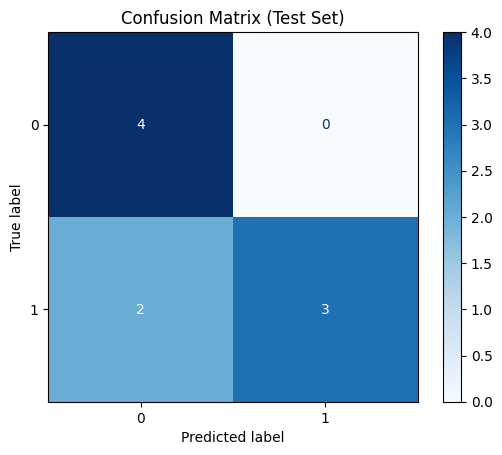

In [70]:
# Compute class weights
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.flatten())
class_weight_dict = dict(enumerate(class_weights))

# In model.fit(), add:
model.fit(X_train_scaled, y_train, epochs=30, batch_size=15, class_weight=class_weight_dict, validation_split=0.1)
# Evaluate model
y_pred_prob = model.predict(X_train_scaled).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Training Classification Report:")
print(classification_report(y_train, y_pred))
print(f"Training Accuracy: {accuracy_score(y_train, y_pred):.4f}")

# Evaluate on validation/test set if available
y_val_pred_prob = model.predict(X_test_scaled).flatten()
y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

print("Test Classification Report:")
print(classification_report(y_test, y_val_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_val_pred):.4f}")

# Confusion matrix for test set
cm = confusion_matrix(y_test, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Set)")
plt.show()